In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Live Demo

In [7]:
x = np.linspace(-5, 5, 20)
x

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [20]:
y = 2 * x + 3

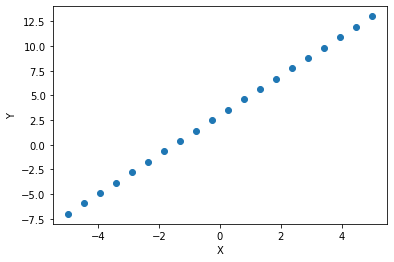

In [10]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [11]:
y_noise = np.random.normal(loc = 0, scale = 1, size = len(x))
y_noise

array([ 4.39885314e-01,  8.48540417e-03, -4.96501209e-01, -5.82540800e-01,
        2.03854775e+00,  1.64655391e+00, -4.23270419e-01,  1.84981199e-03,
        8.16120433e-01,  1.63806203e+00,  1.03622443e+00,  9.92945721e-01,
        1.40133619e+00, -1.52849286e-01, -6.98922822e-01, -8.96867304e-01,
        1.32471694e+00, -1.16086731e+00,  1.72541139e+00,  9.04427555e-01])

In [12]:
y = y + y_noise

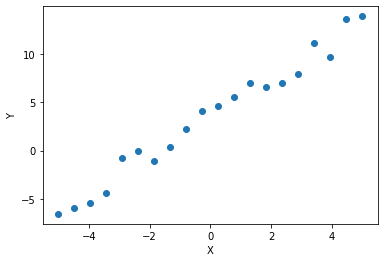

In [13]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [25]:
y_noise = np.random.normal(loc = 0, scale = 4, size = len(x))
y_noise
y = y + y_noise
y

array([-6.89541503, -2.49968386, -3.44760877, -3.13699275, -0.67633838,
       -4.87952877,  4.18510496, -9.42132788,  4.40242608, -4.16054301,
       -3.27857977,  4.46427478, 12.21308911,  2.71141598,  7.87868995,
        5.52891568, 13.84846545, 11.39897677, 13.35815181, 12.59609602])

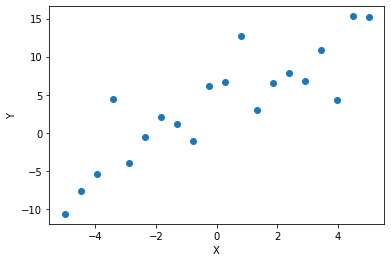

In [18]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

# Start modeling

In [23]:
x = np.array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [28]:
y = np.array([-6.89541503, -2.49968386, -3.44760877, -3.13699275, -0.67633838,
       -4.87952877,  4.18510496, -9.42132788,  4.40242608, -4.16054301,
       -3.27857977,  4.46427478, 12.21308911,  2.71141598,  7.87868995,
        5.52891568, 13.84846545, 11.39897677, 13.35815181, 12.59609602])

In [36]:
def plot_prediction(x, y, a, b):
    y_pred = a * x + b

    plt.scatter(x, y)
    plt.plot(x, y_pred, c = "r", label = "prediction")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

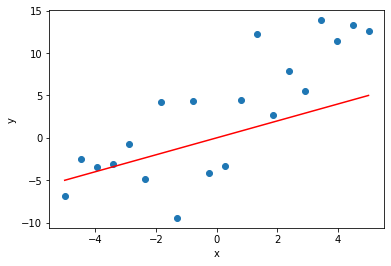

In [37]:
plot_prediction(x,y,1,0)

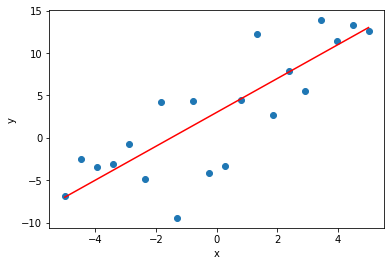

In [38]:
plot_prediction(x,y,2,3)

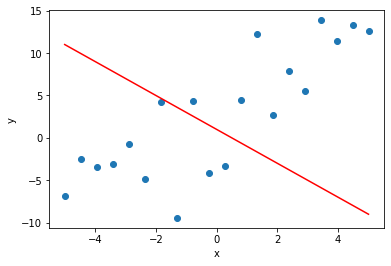

In [39]:
plot_prediction(x,y,-2,1)

In [40]:
def compute_loss(x, y, a, b):
    y_pred = a * x + b
    distances = (y - y_pred) ** 2
    return distances.mean()

In [41]:
compute_loss(x, y, 1, 0)

32.34839220271731

In [42]:
compute_loss(x, y, 2, 3)

16.790536985462087

In [43]:
compute_loss(x, y, -2, 1)

163.3586851792198

In [46]:
def plot_prediction(x, y, a, b):
    y_pred = a * x + b

    plt.scatter(x, y)
    plt.plot(x, y_pred, c = "r", label =f"loss: {compute_loss(x,y, a, b)}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

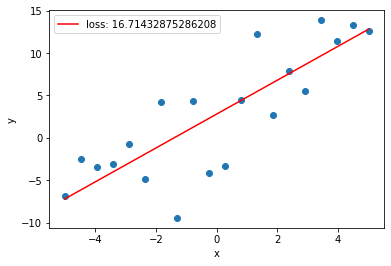

In [50]:
plot_prediction(x,y,2,2.8)

In [53]:
def perform_step(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x +b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x +b))
    
    a_new = a - a_gradient * learning_rate
    b_new = b - b_gradient * learning_rate
    return (a_new, b_new)

In [56]:
a_guess, b_guess = -100, 200
learning_rate = 0.01

for step in range(1000):
    a_guess, b_guess = perform_step(x, y, a_guess, b_guess,learning_rate)
    
print(a_guess, b_guess)

1.9506245587258186 2.7094797505335064


In [57]:
a_guess, b_guess = -10, 2
learning_rate = 0.01

for step in range(1000):
    a_guess, b_guess = perform_step(x, y, a_guess, b_guess,learning_rate)
    
print(a_guess, b_guess)

1.9506245587258186 2.7094794173059693


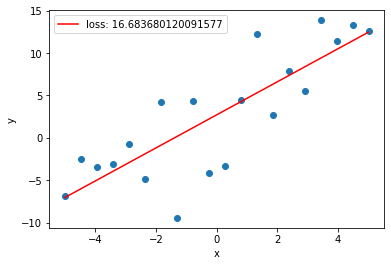

In [58]:
plot_prediction(x,y,1.9506245587258186,2.7094794173059693)